# 3 Exploratory Data Analysis (EDA)

## 3.1 Introduction

### Customers Churn

The Telco company specializes in providing telephone and internet service to California. Thanks to its promotions, the company reached the number of 7,073 customers during the third quarter. However, it encounters serious difficulties in retaining its customers. In fact, the disengagement rate during this quarter was around 26.54%. This difficulty in retaining customers is reflected in the structure of the company's customer base:
    •	25% of customers have less than 9 months of relationship
    •	The median duration of the customer relationship with the company is 29 months, far from the 72 months relationship of the most loyal customers
    •	75% of customers have a relationship duration of less than 55 months.
Telco Management would like to commit to a loyalty policy by reducing the disengagement rate to less than 10% by:
    •	Identification, upon entering a relationship, of the customers most likely to leave the company after the promotion period.
    •	Concrete actions are likely to build loyalty among current customers.
The Data Science team was entrusted with the mission of identifying the factors on which to act to retain existing customers and to develop a model to identify potential customers towards whom future promotions should be directed.
This work involves the participation of:
    •	General management for orientations
    •	Director of the Customer Service team
    •	Director of the Marketing team
    •	Director of Technology
It was produced using information available in the customer database which contains 33 variables for each customer.
The approach adopted is:
    •	To retain the 'Churn Label' column as an explanatory or independent variable
    •	To determine to what extent each of the other variables allows predicting the explanatory variable
    •	To retain the most relevant variables to develop a model based on the regression mode with the smallest absolute error

#### This document is the continuation of the data processing work. It contains:

- Some additional data processing
- Analysis of the relationships of the database variables between them and with the variable of interest


## 3.2 Import necessary packages and set up

In [1]:
# Code task 1# 
# Import os sys to specific needs of my working environment
import os
import sys
sys.path.append('C:/Users/wgerm/OneDrive/Documents/GitHub/DataScienceGuidedCapstone/Notebooks')

In [2]:
# Code task 2#
# Import pandas, numpy, matplotlib, seaborn, PCA, Scale, save_file and geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from library.sb_utils import save_file
import matplotlib.ticker as ticker
import geopandas as gpd

In [3]:
#Code task 3#
# Use the function set_option to visualize all columns of DataFrames
pd.set_option('display.max_columns', None)

## 3.3 Load The Data

### 3.3.1 Churn Data

In [4]:
#Code task 4# 
# Load the churn_data
churn_data = pd.read_csv("df_cust_churn_cleaned_f.csv")

In [5]:
#Code task 5#
# Visualize the head of the dataset
churn_data.head()

,CustomerID,Count,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Name,Name_concat_type,Entity Type,County
0,3668-QPYBK,1.0,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,False,False,False,2.0,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.85,108.15,True,1.0,86.0,3239.0,Competitor made better offer,Los Angeles,Los Angeles CCD,CCD,Los Angeles County
1,3668-QPYBK,1.0,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,False,False,False,2.0,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.85,151.65,True,1.0,86.0,3239.0,Competitor made better offer,Los Angeles,Los Angeles CDP,CDP,Los Angeles County
2,3668-QPYBK,1.0,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,False,False,False,2.0,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.85,820.50,True,1.0,86.0,3239.0,Competitor made better offer,Los Angeles,Los Angeles,CIT,Los Angeles County
3,9237-HQITU,1.0,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,False,False,True,2.0,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.70,3046.05,True,1.0,67.0,2701.0,Moved,Los Angeles,Los Angeles CCD,CCD,Los Angeles County
4,9237-HQITU,1.0,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,False,False,True,2.0,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.70,5036.30,True,1.0,67.0,2701.0,Moved,Los Angeles,Los Angeles CDP,CDP,Los Angeles County


In [6]:
#Code task 6#
# Visualize the informations of the columns
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11779 entries, 0 to 11778
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         11779 non-null  object 
 1   Count              11779 non-null  float64
 2   Zip Code           11779 non-null  float64
 3   Lat Long           11779 non-null  object 
 4   Latitude           11779 non-null  float64
 5   Longitude          11779 non-null  float64
 6   Gender             11779 non-null  object 
 7   Senior Citizen     11779 non-null  bool   
 8   Partner            11779 non-null  bool   
 9   Dependents         11779 non-null  bool   
 10  Tenure Months      11779 non-null  float64
 11  Phone Service      11779 non-null  bool   
 12  Multiple Lines     11779 non-null  bool   
 13  Internet Service   11779 non-null  object 
 14  Online Security    11779 non-null  bool   
 15  Online Backup      11779 non-null  bool   
 16  Device Protection  117

## 3.4 Additional Cleaning

Some additional cleanings are necessary on the dataset to handle the missing values of the columns 24 ('Total Charges') and 29 ('Churn Reason').

Let's first assess their weight in the whole dataset

In [7]:
#Code task 7
# Assess the missing values' weight in the columns 'Total Charges' & 'Churn Reason'
missing_data = pd.concat([churn_data[['Total Charges', 'Churn Reason']].isnull().sum(), 
                         churn_data[['Total Charges', 'Churn Reason']].isnull().mean() *100], axis=1 )# Use the panda function concat to display side by side the number of missing values and the percentage
missing_data.columns = ['Number', '%']                                                                                                        
missing_data

,Number,%
Total Charges,4747,40.300535
Churn Reason,8620,73.181085


Resolution: The missing values' weights of these columns suggest removing them among the features to consider. 

## 3.5 Explore The Data

Before removing any column let verify what kind of information they can provide

### 3.5.1 Churn Reason vs Churn

What are the main reasons customers claim to churn?

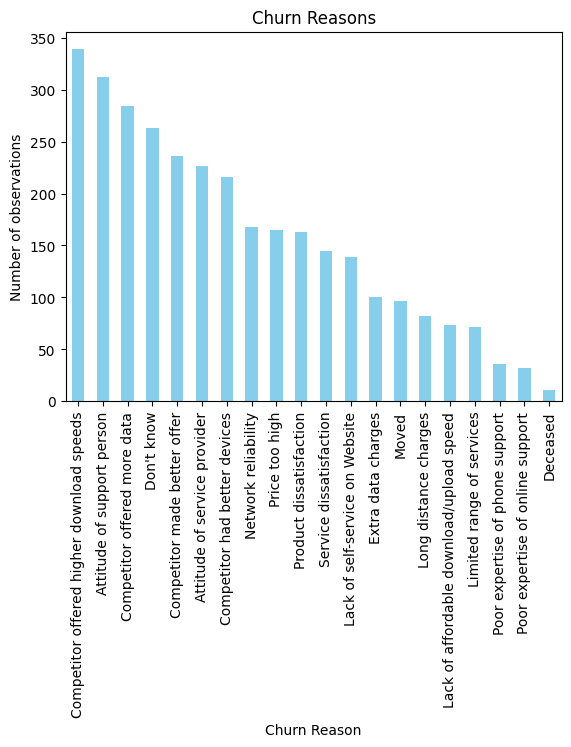

In [8]:
#Code task 8#
# Isolate and sort the column 'Churn Reason'
churn_reason = churn_data['Churn Reason'].value_counts()

#Code task 9#
# Plot the reason of churn
churn_reason.plot(kind='bar', color='skyblue')
plt.title('Churn Reasons')
plt.xlabel('Churn Reason')
plt.ylabel('Number of observations')
plt.show()

In [9]:
# Code task 10#
# Assess the weight of each reason to churn among the customers who provide this information
churn_reason_in_num = pd.concat([churn_data['Churn Reason'].value_counts(), churn_data['Churn Reason'].value_counts() / 
                                 churn_data[(churn_data['Churn Label'] == 1) & (churn_data['Churn Reason'].notnull())].shape[0] * 100], axis=1)
churn_reason_in_num.columns = ['Number', '%']
churn_reason_in_num['Cumul']= churn_reason_in_num['%'].cumsum()
churn_reason_in_num

,Number,%,Cumul
Churn Reason,,,
Competitor offered higher download speeds,339,10.731244,10.731244
Attitude of support person,312,9.876543,20.607787
Competitor offered more data,284,8.990187,29.597974
Don't know,263,8.325419,37.923393
Competitor made better offer,236,7.470719,45.394112
Attitude of service provider,227,7.185818,52.579930
Competitor had better devices,216,6.837607,59.417537
Network reliability,168,5.318139,64.735676
Price too high,165,5.223172,69.958848


##### Pertinent information to include eventually in the final report
The reasons for unsubscribing can be grouped under two broad headings: 

    - The quality of the products and services offered (53.42%) which includes the following reasons: 
        . The competitor offered higher download speeds : 10.71% 
        . The competitor offered more data              : 8.99% 
        . The competitor made a better offer            : 7.47% 
        . The competitor had better devices             : 6.83% 
        . Network reliability                           : 5.31% 
        . Product dissatisfaction                       : 5.15% 
        . Lack of self-service on Website               : 4.40% 
        . Lack of affordable/upload speed               : 2.31% 
        . Limited range of services                     : 2.25%
        
    - Customer service (19.17%)  which takes into account:
        . Attitude of support person                    : 9.87%
        . Attitude of service provider                  : 7.15%
        . Poor expertise on phone support               : 1.14%
        . Poor expertise of online support              : 1.01%

This information will be used in the final report to suggest reengineering products and services and formulate appropriate proposals regarding customer service.



### 3.5.2 Removing the unnecessary columns in the DataFrame

Some columns have to remove:  - 
Total Charges, Churn Reason : Too much missing values  - 
CustomerID and Count : don't bring any information that could help to finetune a mode  - l
Lat Long : concatenation of 2 columns already in the dataset

In [10]:
#Code task 11#
# Remove the columns:'Total Charges', 'Churn Reason','Count','Lat Long','Zip Code','Name_concat_type','Entity Type'
df = churn_data.drop(['Total Charges', 'Churn Reason','Count','Lat Long','Zip Code','Name_concat_type','Entity Type' ], axis=1)

#Code task 12#
# Visualize the dataset columns after removing the indicated columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11779 entries, 0 to 11778
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         11779 non-null  object 
 1   Latitude           11779 non-null  float64
 2   Longitude          11779 non-null  float64
 3   Gender             11779 non-null  object 
 4   Senior Citizen     11779 non-null  bool   
 5   Partner            11779 non-null  bool   
 6   Dependents         11779 non-null  bool   
 7   Tenure Months      11779 non-null  float64
 8   Phone Service      11779 non-null  bool   
 9   Multiple Lines     11779 non-null  bool   
 10  Internet Service   11779 non-null  object 
 11  Online Security    11779 non-null  bool   
 12  Online Backup      11779 non-null  bool   
 13  Device Protection  11779 non-null  bool   
 14  Tech Support       11779 non-null  bool   
 15  Streaming TV       11779 non-null  bool   
 16  Streaming Movies   117

In [11]:
#Code task 13#
# Convert all of the boolean value columns into integer values to be able to use to draw graph using matplotlib
df[df.select_dtypes(['bool']).columns] = df.select_dtypes(['bool']).astype(int)

#Code task 14#
# Visualize the columns after converting the boolean values into integers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11779 entries, 0 to 11778
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         11779 non-null  object 
 1   Latitude           11779 non-null  float64
 2   Longitude          11779 non-null  float64
 3   Gender             11779 non-null  object 
 4   Senior Citizen     11779 non-null  int32  
 5   Partner            11779 non-null  int32  
 6   Dependents         11779 non-null  int32  
 7   Tenure Months      11779 non-null  float64
 8   Phone Service      11779 non-null  int32  
 9   Multiple Lines     11779 non-null  int32  
 10  Internet Service   11779 non-null  object 
 11  Online Security    11779 non-null  int32  
 12  Online Backup      11779 non-null  int32  
 13  Device Protection  11779 non-null  int32  
 14  Tech Support       11779 non-null  int32  
 15  Streaming TV       11779 non-null  int32  
 16  Streaming Movies   117

##### The dataset is tidy now and ready for more analysis

### 3.5.3 Interested column vs The others

##### Our referential column is 'Churn Label'. Let's have an overview of each feature's weight in the churn decision. After will analyze separately each factor

#### 3.5.3.1 Overview of the weight of churn for each column

In [12]:
#Code task 15#
# List of the columns to plot
column_list=['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Churn Value',
       'Churn Score', 'CLTV', 'County']

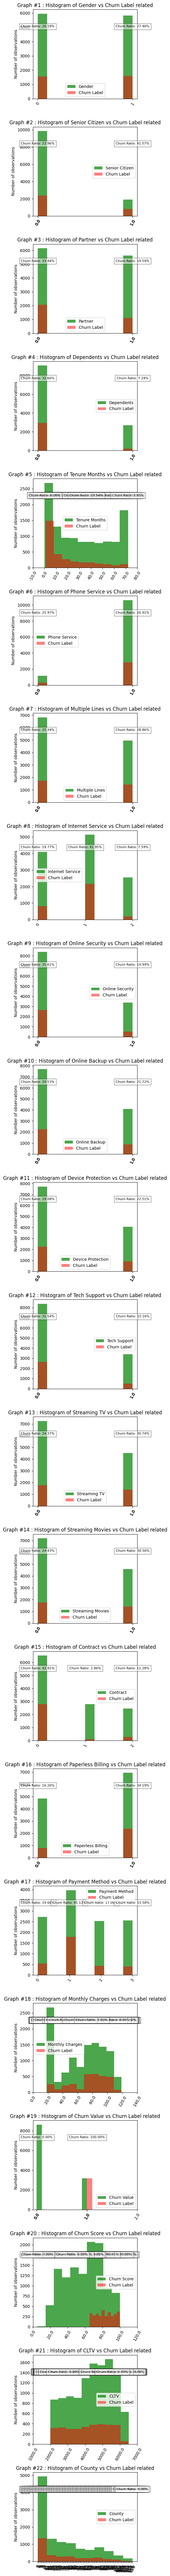

In [13]:
#Code task 16#
# Create subplots
n_features = len(column_list)
fig, axes = plt.subplots(n_features, 1, figsize=(5, 4 * n_features))  # Adjusted figure size for better height

for i, col in enumerate(column_list):
    # Plot histogram of the selected feature in green
    axes[i].hist(df[col], bins=10, color='green', alpha=0.7, label=col)
    
    # Plot histogram of the 'Churn Label' values for the selected feature in red
    axes[i].hist(df[df['Churn Label'] == 1][col], bins=10, color='red', alpha=0.5, label='Churn Label')
    
    # Set titles and labels
    axes[i].set_title(f'Graph #{i+1} : Histogram of {col} vs Churn Label related')
    axes[i].set_ylabel('Number of observations')
    axes[i].legend()

    # Calculate and annotate the churn ratio for each unique value
    unique_values = df[col].unique()
    for value in unique_values:
        churn_count = df[(df[col] == value) & (df['Churn Label'] == 1)].shape[0]
        total_count = df[df[col] == value].shape[0]
        if total_count > 0:  # Avoid division by zero
            churn_ratio = churn_count / total_count
            # Display the churn ratio on the plot for each unique value
            axes[i].text(value, 0.8 * axes[i].get_ylim()[1], 
                          f'Churn Ratio: {churn_ratio:.2%}', 
                          ha='center', fontsize=8, 
                          bbox=dict(facecolor='white', alpha=0.5))

    # Round x-axis ticks for better visibility
    axes[i].set_xticks(np.round(axes[i].get_xticks()))
    axes[i].set_xticklabels(np.round(axes[i].get_xticks()), rotation=60)
    
#Code Task 3#
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### 3.5.3.2 Analyzing some columns vs Churn Label

#### 3.5.3.2-1 Gender vs Churn


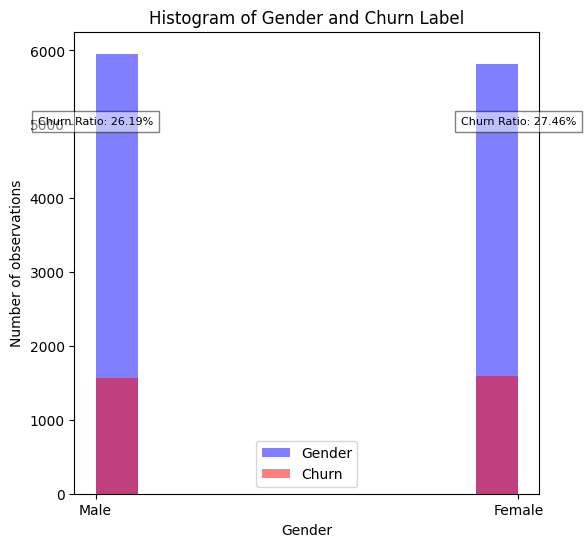

In [14]:
#Code task 17#
# Plot the histogram Gender vs Churn
plt.figure(figsize=(6, 6))
plt.hist(df['Gender'], bins=10, alpha=0.5, label='Gender', color='blue')
plt.hist(df[df['Churn Label'] == 1]['Gender'], bins=10, alpha=0.5, label='Churn', color='red')

# Calculate churn ratio for each unique value in 'Gender'
for value in df['Gender'].unique():
    churn_count = df[(df['Gender'] == value) & (df['Churn Label'] == 1)].shape[0]
    total_count = df[df['Gender'] == value].shape[0]
    if total_count > 0:  # Avoid division by zero
        churn_ratio = churn_count / total_count * 100
        plt.text(value, 0.8 * plt.gca().get_ylim()[1],
                 f'Churn Ratio: {churn_ratio:.2f}%',
                 ha='center', fontsize=8,
                 bbox=dict(facecolor='white', alpha=0.5))

# Customize plot
plt.xlabel('Gender')
plt.ylabel('Number of observations')
plt.title('Histogram of Gender and Churn Label')
plt.legend()


###### Conclusion : The weight of gender in the churn is slightly the same for males and females, respectively 26.19% and 27.46%. 
###### The gender not seems to be a determinant factor for churning

#### 3.5.3-2 Senior Citizen vs Churn

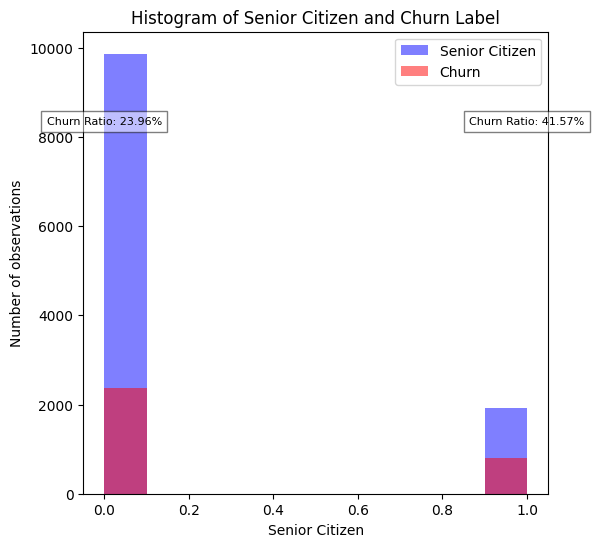

In [15]:
#Code task 18#
#Plot the histogram Senior Citizen vs Churn
plt.figure(figsize=(6, 6))
plt.hist(df['Senior Citizen'], bins=10, alpha=0.5, label='Senior Citizen', color='blue')
plt.hist(df[df['Churn Label'] == 1]['Senior Citizen'], bins=10, alpha=0.5, label='Churn', color='red')

# Calculate churn ratio for each unique value in 'Gender'
for value in df['Senior Citizen'].unique():
    churn_count = df[(df['Senior Citizen'] == value) & (df['Churn Label'] == 1)].shape[0]
    total_count = df[df['Senior Citizen'] == value].shape[0]
    if total_count > 0:  # Avoid division by zero
        churn_ratio = churn_count / total_count * 100
        plt.text(value, 0.8 * plt.gca().get_ylim()[1],
                 f'Churn Ratio: {churn_ratio:.2f}%',
                 ha='center', fontsize=8,
                 bbox=dict(facecolor='white', alpha=0.5))

#Customize plot
plt.xlabel('Senior Citizen')
plt.ylabel('Number of observations')
plt.title('Histogram of Senior Citizen and Churn Label')
plt.legend()

##### Conclusion : Senior citizens are more likely to churn. The churn ratio for this category is almost double that of younger people. This requires further investigation.

#### What is the main services uses by the Senior Citizens?

In [16]:
# Identify the products or services most used by Senior Citizens

#Code task 19#
# Create a pivot table with a statue of Senior Citizens in rows and the services and products in columns
pivot_table = pd.pivot_table(df, 
                             values=['Phone Service', 'Multiple Lines',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies'], 
                             aggfunc='sum', 
                            index=['Senior Citizen'], 
                             fill_value=0)

#Code task 20#
# Calculate the percentage for each index in each column
percentages = pivot_table.div(pivot_table.sum(axis=0), axis=1) * 100

#Code task 21#
# Add the percentage columns to the pivot table
for column in percentages.columns:
    pivot_table[f'{column} %'] = percentages[column]
pivot_table

,Device Protection,Multiple Lines,Online Backup,Online Security,Phone Service,Streaming Movies,Streaming TV,Tech Support,Device Protection %,Multiple Lines %,Online Backup %,Online Security %,Phone Service %,Streaming Movies %,Streaming TV %,Tech Support %
Senior Citizen,,,,,,,,,,,,,,,,
0,3272,3842,3288,2916,8877,3594,3569,2961,80.750247,77.537841,80.430528,85.891016,83.619066,78.351864,78.803268,87.165146
1,780,1113,800,479,1739,993,960,436,19.249753,22.462159,19.569472,14.108984,16.380934,21.648136,21.196732,12.834854


##### Conclusion :Seniors occupy a relatively large share of :
           - Multi Line Services (22.46%),
           - Streaming Movies (21.64%),
           - Streaming TV (21.96%).
     
##### This could explain the results presented by graphs 7, 13 and 14 :  Users of these services are likelier to churn than those who do not use them. 
##### For commercial purposes, it is therefore necessary to compare the quality of these services with that offered by competing companies to the Senior Citizens.

#### 3.5.3-3 Tenure Months vs Churn
Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above

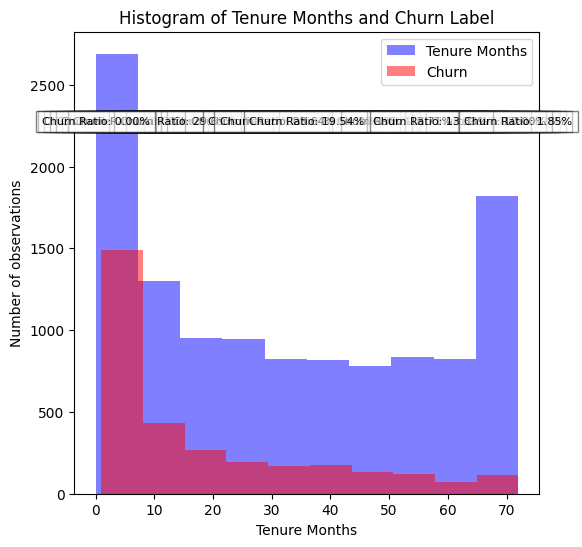

In [17]:
# Code task 22#
# Plot Tenure Months vs Churn
plt.figure(figsize=(6, 6))
plt.hist(df['Tenure Months'], bins=10, alpha=0.5, label='Tenure Months', color='blue')
plt.hist(df[df['Churn Label'] == 1]['Tenure Months'], bins=10, alpha=0.5, label='Churn', color='red')

# Calculate churn ratio for each unique value in 'Gender'
for value in df['Tenure Months'].unique():
    churn_count = df[(df['Tenure Months'] == value) & (df['Churn Label'] == 1)].shape[0]
    total_count = df[df['Tenure Months'] == value].shape[0]
    if total_count > 0:  # Avoid division by zero
        churn_ratio = churn_count / total_count * 100
        plt.text(value, 0.8 * plt.gca().get_ylim()[1],
                 f'Churn Ratio: {churn_ratio:.2f}%',
                 ha='center', fontsize=8,
                 bbox=dict(facecolor='white', alpha=0.5))

# Customize plot
plt.xlabel('Tenure Months')
plt.ylabel('Number of observations')
plt.title('Histogram of Tenure Months and Churn Label')
plt.legend()


The highest churn rate is observed in the 0 and 24-month bracket. It tends to stabilize at around 45 months. 
The presence of a spike in the number of customers with 70 months of contract with Telco testifies 
to the decrease in the churn rate in the customer bracket that exceeds 24 months of contract with the company.

#### 3.5.3-4 Location customers vs Churn


###### Does the location impact the tendency of to churn?

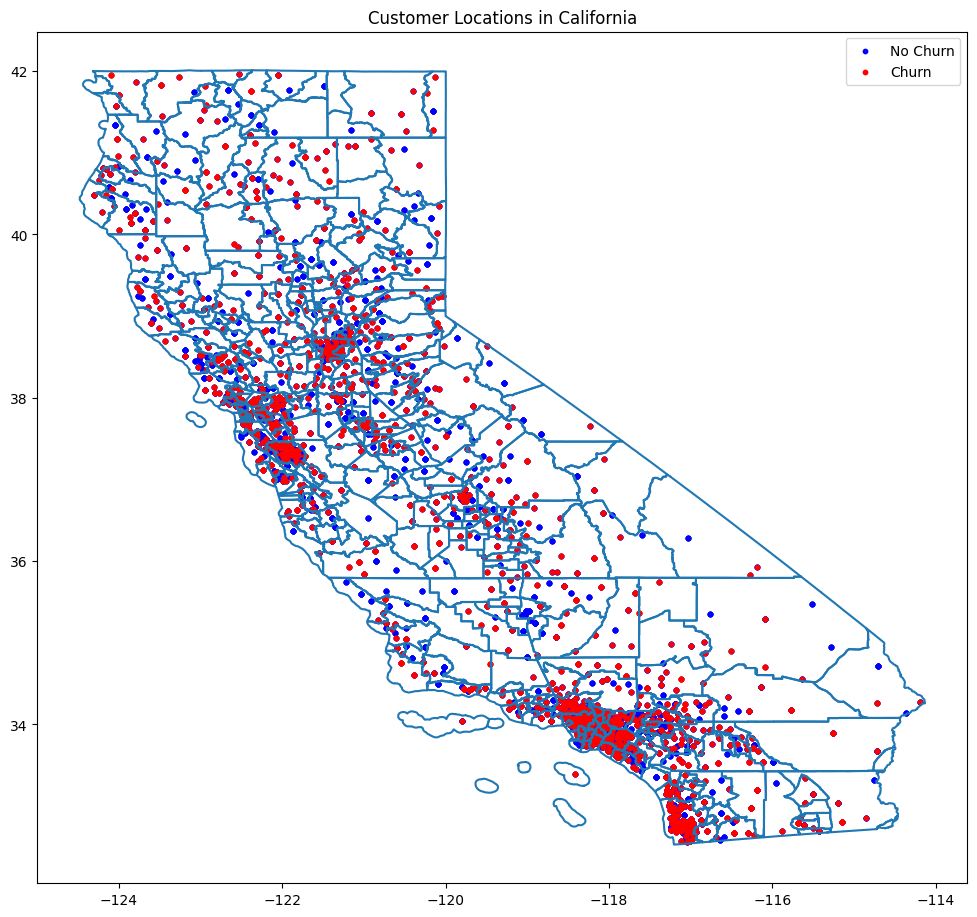

In [18]:
#Code task 23#
# Create a GeoDataFrame for customer locations 
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

#Code task 24#
# Load the California states shapefile 
california = gpd.read_file("C:/Users/wgerm/OneDrive/Documents/GitHub/Territories/tl_2023_06_cousub_county_California/tl_2023_06_cousub.shp") 
#california = states[states['name'] == 'California']

#Code task 25#
# Plotting 
fig, ax = plt.subplots(figsize=(12, 12)) 
california.boundary.plot(ax=ax) 

gdf[gdf['Churn Label']==0].plot(ax=ax, color='blue', markersize=10, label='No Churn') 
gdf[gdf['Churn Label']==1].plot(ax=ax, color='red', markersize=10, label='Churn') 
plt.title('Customer Locations in California')
plt.legend()
plt.show()

#### The tendency of churn is not uniform in the State of California. 4 clusters appear on the graph. The location seems to have an impact in the decision to churn

### 3.5.4 Feature correlation heatmap

<Axes: >

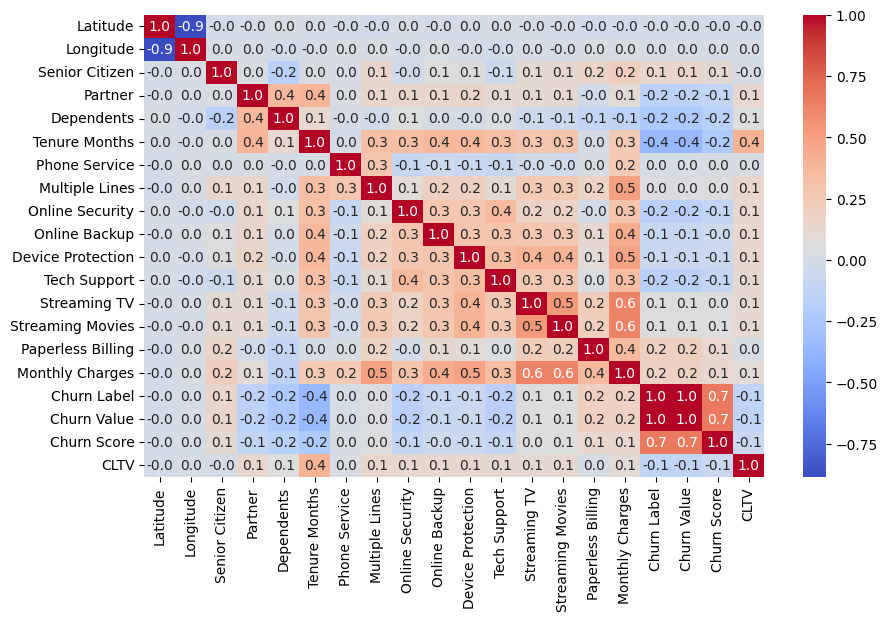

In [19]:
#Code task 26#
#Show a seaborn heatmap of correlation in df using pandas 'coo=rr()' method

plt.subplots(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt=".1f", cmap='coolwarm')

##### In general, the other features present in the dataset have low correlations with the column of interest. We will therefore eliminate the features that have:
- a zero correlation coefficient
- a strong collinearity between them

Thus we will eliminate the columns 'Longitude', 'Latitude', 'Phone Service', 'Multiple Lines'
'Churn Value'.
Statistically, there is no correlation between California cities and the decision to unsubscribe.

In [20]:
#Code task 27#
# Remove features with zero correlation coefficient and strong collinearity between them
df.drop(['Longitude', 'Latitude', 'Churn Value'], inplace=True, axis=1)

In [21]:
#Code task 28# 
# Visualize df after removing the unnecessary features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11779 entries, 0 to 11778
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         11779 non-null  object 
 1   Gender             11779 non-null  object 
 2   Senior Citizen     11779 non-null  int32  
 3   Partner            11779 non-null  int32  
 4   Dependents         11779 non-null  int32  
 5   Tenure Months      11779 non-null  float64
 6   Phone Service      11779 non-null  int32  
 7   Multiple Lines     11779 non-null  int32  
 8   Internet Service   11779 non-null  object 
 9   Online Security    11779 non-null  int32  
 10  Online Backup      11779 non-null  int32  
 11  Device Protection  11779 non-null  int32  
 12  Tech Support       11779 non-null  int32  
 13  Streaming TV       11779 non-null  int32  
 14  Streaming Movies   11779 non-null  int32  
 15  Contract           11779 non-null  object 
 16  Paperless Billing  117

In [22]:
# Code task 29 Save data
#Save the data to new csv file
datapath = "C:/Users/wgerm/OneDrive/Documents/GitHub/Customer_churn_workfile/df_churn_eda_f.csv"
df.to_csv(datapath, index=False)

END